# 6.01 Time Series Analysis

## Content 
01 Import libraries

# 01 Import libraries
Task 1. Install the Quandl library and register for a Quandl account as described in the Exercise.

In [10]:
# Import libraries 
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [12]:
# Configure API key 
quandl.ApiConfig.api_key = 'udJQk13SPPpynCNBzYsf'

# 02 Import data
Task 2. Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

Dats source: U.S. Bureau of Economic Analysis, Health Expenditures per Capita [HLTHSCPCHCSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/HLTHSCPCHCSA, February 8, 2025.

The data looks at the healthcare expenditures per capita in the US. This data is very valuable since the insurance dataset looks into per capita health charges. This allows us to have a reference for where the health expenses in the insurance data set lie on the historical scale irrespective of historical population changes. Data was obtained from FED since Quandl did not have health related data.

In [14]:
# Load data us health expenditure
# index_col=0 to set the observation date as index
us_health_year=pd.read_csv(r'/Users/DA77/CF/Open_Data_Project/02_Data/2.02_Prepared_Data/us_health_year.csv')

In [16]:
# Remove extra index column
if 'Unnamed: 0' in us_health_year.columns:
    us_health_year = us_health_year.drop(columns=['Unnamed: 0'])

In [18]:
# Set 'observation_date' as index
us_health_year.set_index('observation_date', inplace=True)

# Convert to datetime format (assuming 'YYYY' format)
us_health_year.index = pd.to_datetime(us_health_year.index, format='%Y')

In [20]:
# Rename value column for better undestanding
us_health_year.rename(columns = {'HLTHSCPCHCSA' : 'expenditures_per_capita'}, inplace = True)

In [22]:
us_health_year.head()

,expenditures_per_capita
observation_date,
2000-01-01,3932.451513
2001-01-01,4228.530789
2002-01-01,4548.801815
2003-01-01,4817.655228
2004-01-01,5114.388333


In [66]:
us_health_year.shape

(22, 1)

In [68]:
us_health_year.columns

Index(['expenditures_per_capita'], dtype='object')

In [72]:
type(us_health_year)

pandas.core.frame.DataFrame

# 03 Subsetting 
Task 3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example).  
Also, make sure your set doesn’t include any forecasted data.  
In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.  
Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

**Note**. The data used includes data from the last 20 xears (2000-2021) and already includes the relevant years of healtcare expenditure in the US. Hence no subsetting was done.

# 04 Time Series Analysis

## Task 4. Create a line chart of your data.

In [21]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [22]:
plt.savefig(r'/Users/DA77/CF/Open_Data_Project/04_Analysis/4.06_TimeSeries_Visuals/linechart_timeseries.png')

<Figure size 640x480 with 0 Axes>

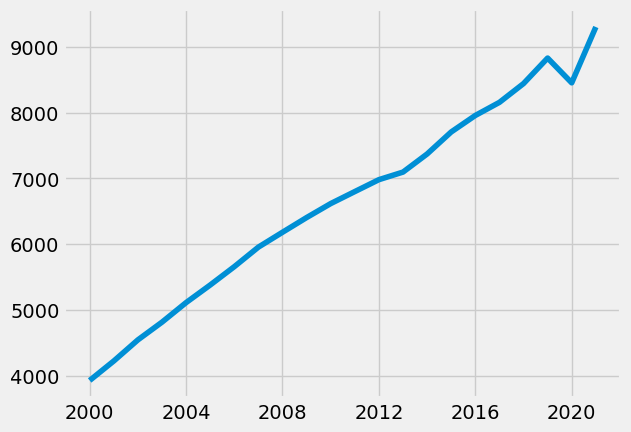

In [23]:
plt.plot(us_health_year)

## Task 5. Decompose the data’s components.
Analyze the results from the plot in a markdown cell.


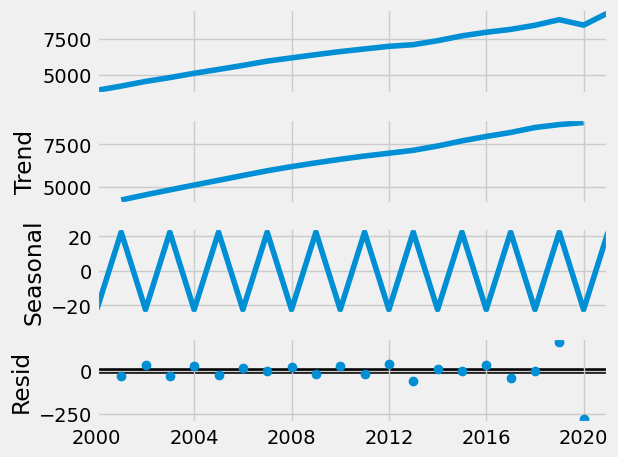

In [25]:
# Perform # Decompose the time series using an additive model since we line chart indicates a linear relationship 

# Perform decomposition
decomposition = sm.tsa.seasonal_decompose(us_health_year, model='additive', period=2)

# Plot the decomposition
fig = decomposition.plot()

# Save the plot
fig.savefig(r'/Users/DA77/CF/Open_Data_Project/04_Analysis/4.06_TimeSeries_Visuals/decomposition.png', dpi=300, bbox_inches='tight')

**Analysis**. The trend line is steadily increasing in a linear fashion with a moderately steep slope, similar to the level line, indicating consistent growth over time. The seasonal component shows strong fluctuations, reflecting significant recurring patterns at regular intervals, such as yearly cycles. These seasonal fluctuations are more pronounced than the trend, suggesting that seasonality plays a major role in the data's behavior. The residual component shows small random deviations close to the zero line, indicating that most of the variation has been accounted for by the trend and seasonal components. There is minimal unexplained noise, suggesting the decomposition model fits the data well. Overall, the time series exhibits consistent growth with strong seasonal patterns, and the residuals indicate a good fit with little remaining randomness.

## Task 6. Conduct a Dickey-Fuller test to check for stationarity.  
Interpret the results in a markdown cell and reference your null hypothesis.


In [24]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(us_health_year['expenditures_per_capita'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.096123
p-value                         0.949823
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


**Intepretation**. Based on the Test-Statistic of -0.06 and critical value of -3.15 (the null hypothesis (presense of a unit root = a random jump that cant be explained by variation in data) cannot be rejected at the 5% level . Hence the data is non-stationary.  

## Task 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [26]:
us_health_year_diff = us_health_year - us_health_year.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [28]:
us_health_year_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [30]:
us_health_year_diff.head()

,expenditures_per_capita
observation_date,
2001-01-01,296.079276
2002-01-01,320.271027
2003-01-01,268.853413
2004-01-01,296.733106
2005-01-01,267.712048


In [86]:
us_health_year_diff.columns

Index(['expenditures_per_capita'], dtype='object')

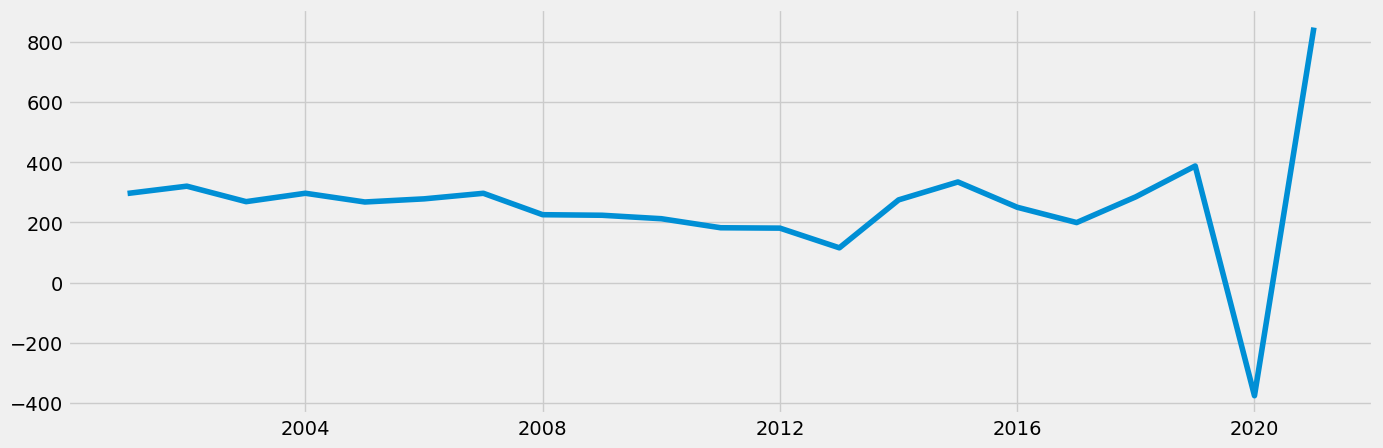

In [88]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(us_health_year_diff)

In [90]:
# Apply the Dickey Fulley test again using the function on the time series
dickey_fuller(us_health_year_diff['expenditures_per_capita'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.492710
p-value                         0.008176
Number of Lags Used             8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


**Intepretation**. Based on the Test-Statistivs of -3.49 and the critical value of -3.15 the null hypothesis (presense of a unit root = a random jump that cant be explained by variation in data) can be rejected since Test< citircal value at the 5% level. Hence the data is stationary. 

## Task 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.


N/A.

## Task 9. Check your data’s autocorrelations.

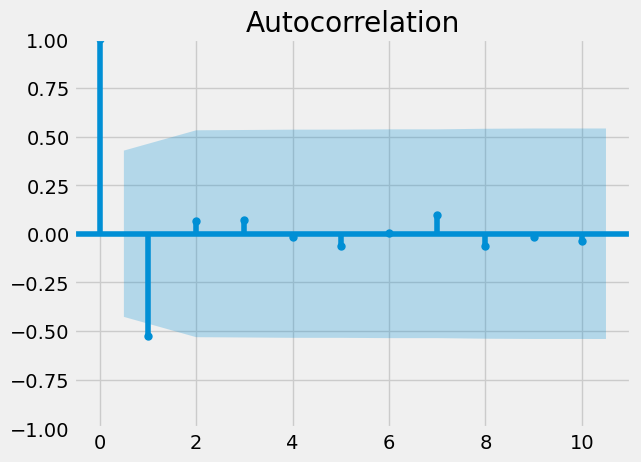

<Figure size 640x480 with 0 Axes>

In [35]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(us_health_year_diff)
plt.show()
plt.savefig(r'/Users/DA77/CF/Open_Data_Project/04_Analysis/4.06_TimeSeries_Visuals/05_autocorrelation.png')

**Interpretation**. It looks like data is mildy autocorrelated, indicating non-stationary data, since there is only one lag outside the blue confidence interval area.